# LSTM Encoder

RNN model to encode an abstract and predict the gender of the study

In [45]:
%store -r abstracts_w2v_embeddings abstracts_targets_collapsed

### Training Data

In [46]:
X_idxs = list(abstracts_targets_collapsed.abstracts_idxed)

ys = abstracts_targets_collapsed.gender

# Binarize ys
num_classes = len(ys.unique())
binarize = {i: label for i, label in zip(ys.unique(), range(num_classes))}
ys = ys.map(binarize)

### Hyperparameters

In [47]:
M, WORD_DIM = abstracts_w2v_embeddings.shape
H, C = 10, len(ys.unique())
learning_rate = .005

In [48]:
from rnn.cell import VanillaCell, LSTMCell
from rnn.encoder import FixedVectorEncoder
from rnn.decoder import SoftmaxDecoder

cell = LSTMCell(H, WORD_DIM, memory_dim=H)
# cell = VanillaCell(H, WORD_DIM)
encoder, decoder = FixedVectorEncoder(cell), SoftmaxDecoder(H, num_classes)

In [49]:
from rnn.model import RNN

rnn = RNN(abstracts_w2v_embeddings, H, num_classes, encoder, decoder)

### Example

In [50]:
M = 10

def training_example_generator():
    while True:
        for x_idxs, y in zip(X_idxs[:M], ys[:M]):
            yield x_idxs, y

In [51]:
def loss_generator(num_iters):
    example = training_example_generator()

    for i in range(num_iters):
        x_idxs, y = next(example)

        rnn.do_sgd(x_idxs, y, learning_rate)
        
        if not i % 100:
            abstracts = [next(example) for _ in range(M)]
            loss = np.mean([rnn.do_sgd(x_idxs, y, learning_rate) for x_idxs, y in abstracts])
            
            yield loss

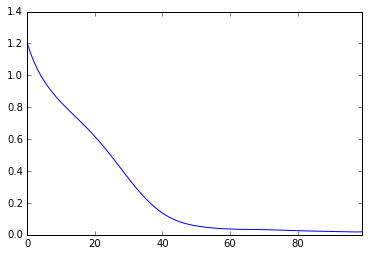

In [52]:
pd.Series([float(loss) for loss in list(loss_generator(10000))]).plot()